# _`automaton`_`.expression(`_`identities`_`="default", `_algo_` = `"auto"`)`

Apply the Brzozowski-McCluskey procedure, to compute a (basic) expression from an automaton.

Arguments:
- `identities`: the identities of the resulting expression
- `algo`: a heuristics to choose the order in which states are eliminated
  - "auto": same as `"best"`
  - "best": run all the heuristics, and return the shortest result
  - "naive": a simple heuristics which eliminates states with few incoming/outgoing transitions
  - "delgado": choose a state whose removal would add a small expression (number of nodes) to the result
  - "delgado_label": choose a state whose removal would add a small expression (number of labels in the expression) to the result

See also:
- [_automaton_.eliminate_state](automaton.eliminate_state.ipynb)
- [_automaton_.lift](automaton.lift.ipynb)

## Examples

In [1]:
import vcsn
import pandas as pd
pd.options.display.max_colwidth = 0

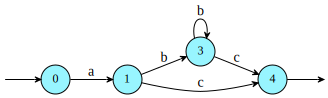

In [2]:
a = vcsn.B.expression('ab*c').standard()
a

In [3]:
a.expression(algo = "naive")

ac+abb*c

In [4]:
a.expression(algo = "best")

a(c+bb*c)

Unfortunately there is no guarantee that the resulting expression is as simple as one could hope for.  Note also that [_expression_.derived_term](expression.derived_term.ipynb) tends to build automata which give nicer results than [_expression_.standard](expression.standard.ipynb).

In [5]:
def latex(e):
    return '$' + e.format('latex') + '$'
def example(*es):
    res = [[latex(e),
            latex(e.standard().expression(algo="naive")),
            latex(e.derived_term().expression(algo="naive"))]
           for e in [vcsn.Q.expression(e) for e in es]]
    return pd.DataFrame(res, columns=['Input', 'Via Standard', 'Via Derived Term'])
example('a', 'a+b+a', 'a+b+a', 'ab*c', '[ab]{2}')

,Input,Via Standard,Via Derived Term
0,$a$,$a$,$a$
1,"$ \left\langle 2 \right\rangle \,a + b$","$ \left\langle 2 \right\rangle \,a + b$","$ \left\langle 2 \right\rangle \,a + b$"
2,"$ \left\langle 2 \right\rangle \,a + b$","$ \left\langle 2 \right\rangle \,a + b$","$ \left\langle 2 \right\rangle \,a + b$"
3,"$a \, {b}^{*} \, c$","$a \, c + a \, b \, {b}^{*} \, c$","$a \, {b}^{*} \, c$"
4,$\left(a + b\right)^{2}$,"$a \, a + a \, b + b \, a + b \, b$",$\left(a + b\right)^{2}$


## Identities
You may pass the desired identities as an argument.

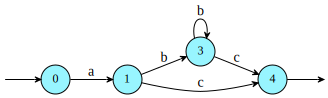

In [6]:
a

In [7]:
a.expression('trivial')

a(c+(bb*)c)

In [8]:
a.expression('linear')

a(c+bb*c)